# 3 - 

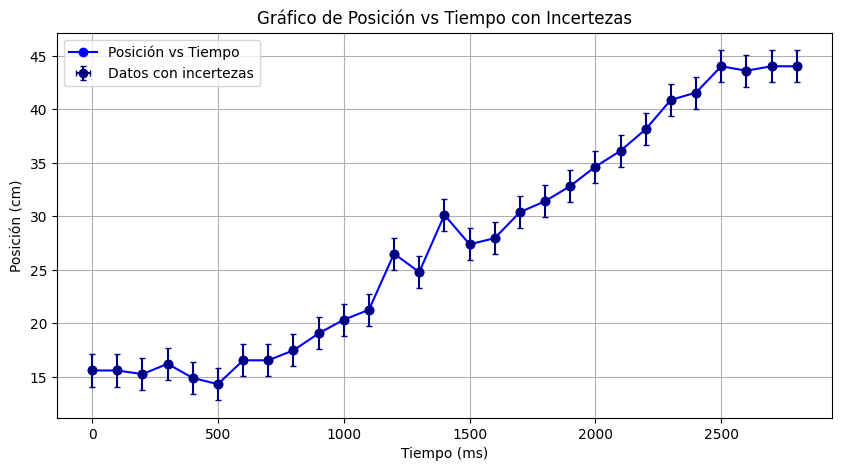

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Datos proporcionados en formato de diccionario para crear el DataFrame
data = {
    "Tiempo": [
        0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 
        1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800
    ],
    "Posición": [
        15.61, 15.61, 15.27, 16.23, 14.91, 14.33, 16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 
        26.52, 24.80, 30.14, 27.40, 27.97, 30.40, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 
        41.57, 44.03, 43.62, 44.03, 44.03
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Incertezas
sigma_t = 0  # Incerteza en el tiempo
sigma_d = 1.5  # Incerteza en la distancia

# Crear gráfico de distancia vs tiempo con barras de error y línea que une los puntos
plt.figure(figsize=(10, 5))
plt.errorbar(df["Tiempo"], df["Posición"], yerr=sigma_d, xerr=sigma_t, fmt='o', c='navy', capsize=2, label='Datos con incertezas') # Datos con incertezas
plt.plot(df["Tiempo"], df["Posición"], marker='o', linestyle='-', color='b', label='Posición vs Tiempo')  # Línea que une los puntos
plt.xlabel("Tiempo (ms)")
plt.ylabel("Posición (cm)")
plt.title("Gráfico de Posición vs Tiempo con Incertezas")
plt.legend()
plt.grid(True)
plt.show()


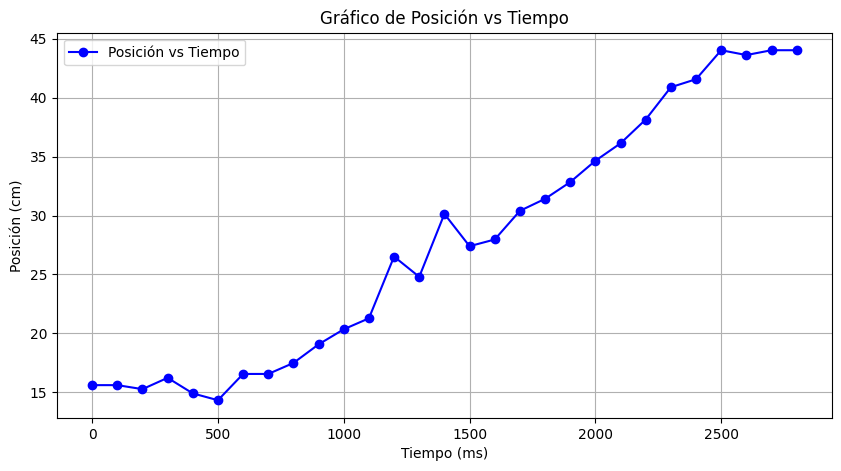

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Datos proporcionados en formato de diccionario para crear el DataFrame
data = {
    "Tiempo": [
        0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 
        1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800
    ],
    "Posición": [
        15.61, 15.61, 15.27, 16.23, 14.91, 14.33, 16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 
        26.52, 24.8, 30.14, 27.4, 27.97, 30.4, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 
        41.57, 44.03, 43.62, 44.03, 44.03
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear gráfico de distancia vs tiempo
plt.figure(figsize=(10, 5))
plt.plot(df["Tiempo"], df["Posición"], marker='o', linestyle='-', color='b', label='Posición vs Tiempo')
plt.xlabel("Tiempo (ms)")
plt.ylabel("Posición (cm)")
plt.title("Gráfico de Posición vs Tiempo")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def aceleracion_ajuste_cuadratico(tiempo, posicion, incerteza_posicion, M, m):
    # Definir la función cuadrática para el ajuste
    def modelo_cuadratico(t, a, v0, x0):
        return (a/2) * t**2 + v0 * t + x0

    # Realizar el ajuste cuadrático
    parametros, covarianza = curve_fit(modelo_cuadratico, tiempo, posicion)
    a_fit, v0_fit, x0_fit = parametros
    v0_fit = 0 if v0_fit < 0 else v0_fit  # La velocidad inicial no puede ser negativa

    # Calcular incertezas en los parámetros
    incertezas_parametros = np.sqrt(np.diag(covarianza))

    # Graficar los datos y el ajuste
    plt.errorbar(tiempo, posicion, yerr=incerteza_posicion, fmt='o', label="Datos experimentales", capsize=3)
    t_fit = np.linspace(0, max(tiempo), 500)
    posicion_fit = modelo_cuadratico(t_fit, *parametros)
    plt.plot(t_fit, posicion_fit, label="Ajuste cuadrático", color='red')

    # Mostrar resultados en el gráfico
    texto = (f"Aceleración (a): ({a_fit:.3f} ± {incertezas_parametros[0]:.3f}) cm/s²\n"
             f"Velocidad inicial (v0): ({v0_fit:.3f} ± {incertezas_parametros[1]:.3f}) cm/s\n"
             f"Posición inicial (x0): ({x0_fit:.3f} ± {incertezas_parametros[2]:.3f}) cm")

    plt.text(0.025, 0.7, texto, transform=plt.gca().transAxes, fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black"))

    # Detalles del gráfico
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (cm)")
    plt.title(f"Gráfico de Posición vs Tiempo con Ajuste Cuadrático - M={M}[g], m={m}[g]")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"ajuste_cuadratico_M{M}g_m{m}g.png")
    plt.show()

    # Imprimir los resultados del ajuste
    print(f"Ajuste cuadrático:")
    print(f"Aceleración (a): {a_fit:.3f} ± {incertezas_parametros[0]:.3f} cm/s^2")
    print(f"Velocidad inicial (v0): {v0_fit:.3f} ± {incertezas_parametros[1]:.3f} cm/s")
    print(f"Posición inicial (x0): {x0_fit:.3f} ± {incertezas_parametros[2]:.3f} cm")

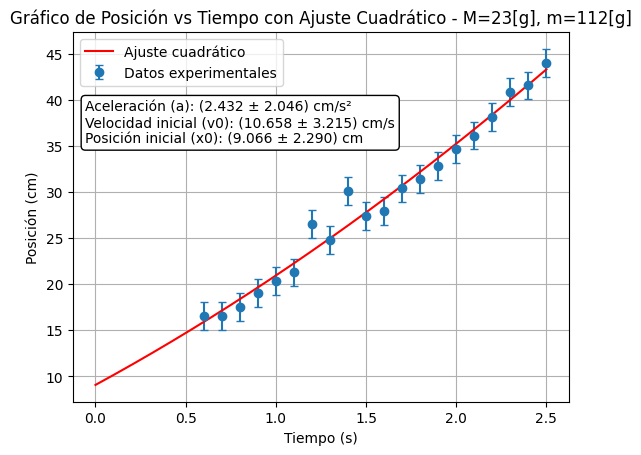

Ajuste cuadrático:
Aceleración (a): 2.432 ± 2.046 cm/s^2
Velocidad inicial (v0): 10.658 ± 3.215 cm/s
Posición inicial (x0): 9.066 ± 2.290 cm


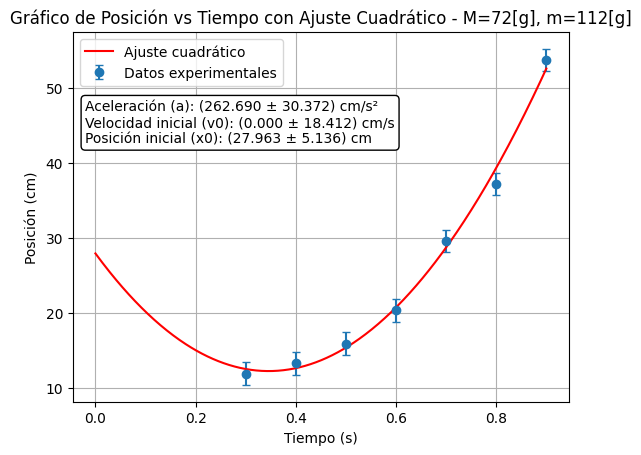

Ajuste cuadrático:
Aceleración (a): 262.690 ± 30.372 cm/s^2
Velocidad inicial (v0): 0.000 ± 18.412 cm/s
Posición inicial (x0): 27.963 ± 5.136 cm


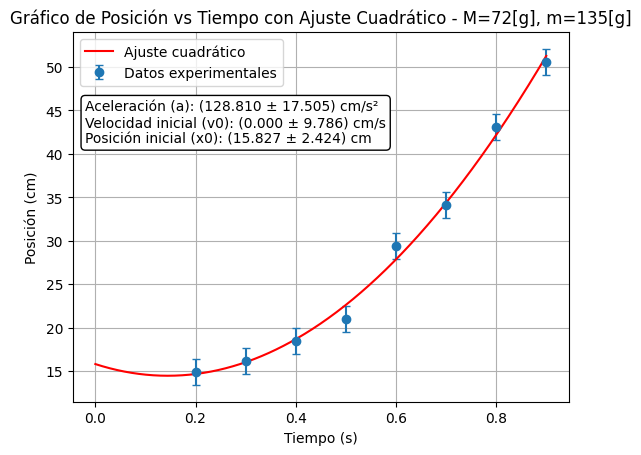

Ajuste cuadrático:
Aceleración (a): 128.810 ± 17.505 cm/s^2
Velocidad inicial (v0): 0.000 ± 9.786 cm/s
Posición inicial (x0): 15.827 ± 2.424 cm


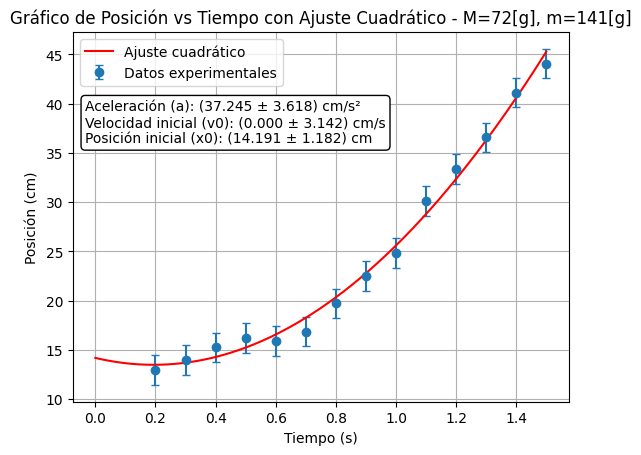

Ajuste cuadrático:
Aceleración (a): 37.245 ± 3.618 cm/s^2
Velocidad inicial (v0): 0.000 ± 3.142 cm/s
Posición inicial (x0): 14.191 ± 1.182 cm


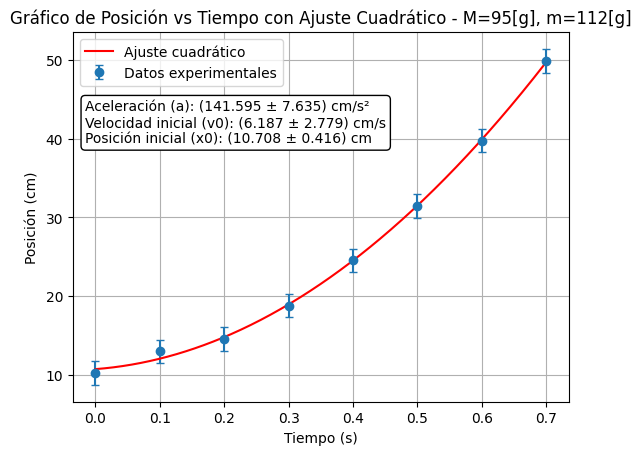

Ajuste cuadrático:
Aceleración (a): 141.595 ± 7.635 cm/s^2
Velocidad inicial (v0): 6.187 ± 2.779 cm/s
Posición inicial (x0): 10.708 ± 0.416 cm


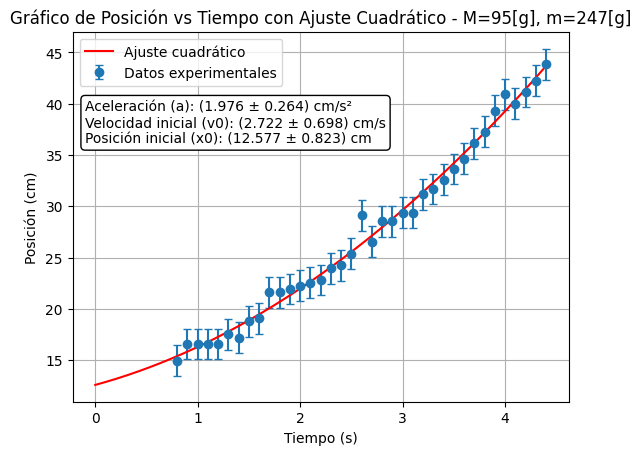

Ajuste cuadrático:
Aceleración (a): 1.976 ± 0.264 cm/s^2
Velocidad inicial (v0): 2.722 ± 0.698 cm/s
Posición inicial (x0): 12.577 ± 0.823 cm


In [4]:
# Prueba 1 (Plateada vs Trineo)
tiempo_1 = np.array([600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 
            1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]) / 1000  # Convertir a segundos

posiciones_1 = ([16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 
                26.52, 24.8, 30.14, 27.4, 27.97, 30.4, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 
                41.57, 44.03])

# Prueba 2 (Dorada vs Trineo)
tiempo_2 = np.array([300, 400, 500, 600, 700, 800, 900]) / 1000

posiciones_2 = [11.92, 13.31, 15.93, 20.35, 29.61, 37.26, 53.75]

# Prueba 3 (Dorada vs Plateada dentro del trineo)
tiempo_3 = np.array([200, 300, 400, 500, 600, 700, 800, 900]) / 1000

posiciones_3 = [14.93, 16.23, 18.46, 20.98, 29.36, 34.14, 43.04, 50.56]

# Prueba 4 (Dorada vs Rozamiento, Plateada y Madera)
tiempo_4 = np.array([200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]) / 1000

posiciones_4 = [12.95, 13.99, 15.27, 16.23, 15.93, 16.86, 19.72, 
                22.53, 24.82, 30.14, 33.37, 36.57, 41.12, 44.05]

# Prueba 5 (Plateada y Dorada vs Rozamiento)
tiempo_5 = np.array([0, 100, 200, 300, 400, 500, 600, 700]) / 1000

posiciones_5 = [10.2, 12.95, 14.57, 18.77, 24.53, 31.42, 39.76, 49.9]

# Prueba 6 (Plateada y Dorada vs Rozamiento y Calculadora)
tiempo_6 = np.array([800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 
            1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 
            3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400]) / 1000

posiciones_6 = [14.93, 16.56, 16.56, 16.56, 16.56, 
                17.51, 17.19, 18.77, 19.09, 21.61, 21.61, 21.93, 22.24, 22.53, 22.81, 23.95, 24.24, 25.38, 
                29.1, 26.54, 28.53, 28.54, 29.38, 29.36, 31.16, 31.67, 32.59, 33.63, 34.65, 36.13, 37.26, 
                39.32, 40.9, 40, 41.14, 42.25, 43.84]

incerteza_distancia = 1.5  # cm

# Masas
# Pelotas
madera = 6
plateada = 23
dorada = 72

trineo = 112
calculadora = 135

# Cálculos de aceleración con ajuste cuadrático
aceleracion_ajuste_cuadratico(tiempo_1, posiciones_1, incerteza_distancia, plateada, trineo)
aceleracion_ajuste_cuadratico(tiempo_2, posiciones_2, incerteza_distancia, dorada, trineo)
aceleracion_ajuste_cuadratico(tiempo_3, posiciones_3, incerteza_distancia, dorada, trineo+plateada)
aceleracion_ajuste_cuadratico(tiempo_4, posiciones_4, incerteza_distancia, dorada, trineo+madera+plateada)
aceleracion_ajuste_cuadratico(tiempo_5, posiciones_5, incerteza_distancia, plateada+dorada, trineo)
aceleracion_ajuste_cuadratico(tiempo_6, posiciones_6, incerteza_distancia, plateada+dorada, trineo+calculadora)

# 4 -

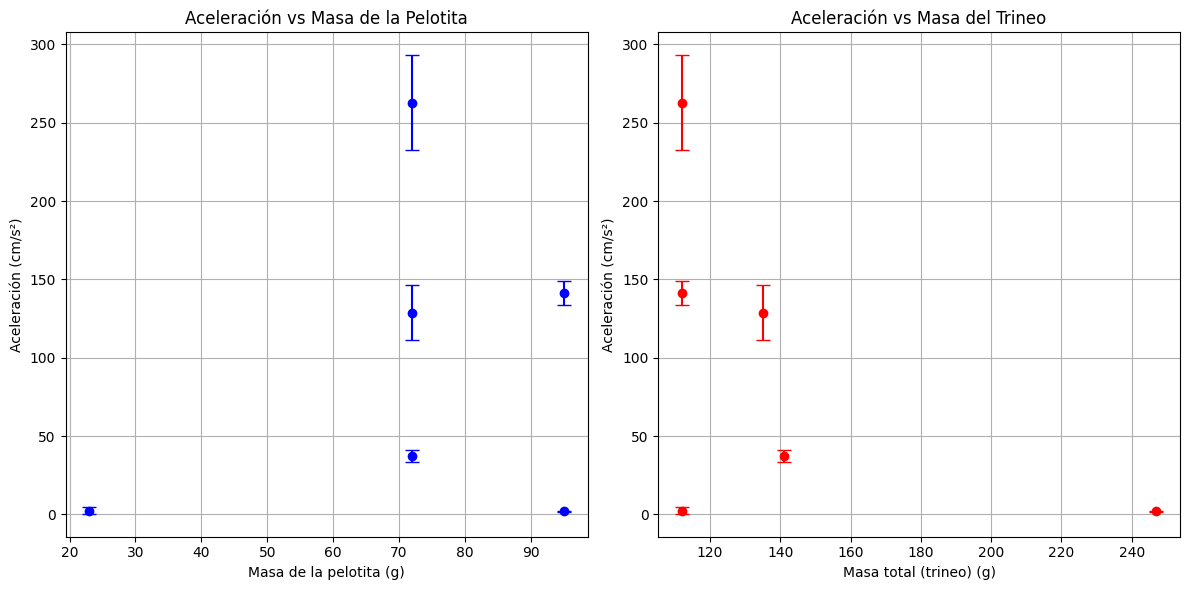

Prueba 1: Aceleración = 2.4315 ± 2.0464 cm/s²
Prueba 2: Aceleración = 262.6905 ± 30.3716 cm/s²
Prueba 3: Aceleración = 128.8095 ± 17.5054 cm/s²
Prueba 4: Aceleración = 37.2445 ± 3.6176 cm/s²
Prueba 5: Aceleración = 141.5952 ± 7.6345 cm/s²
Prueba 6: Aceleración = 1.9760 ± 0.2642 cm/s²


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función cuadrática
def quadratic(t, a, b, c):
    return a * t**2 + b * t + c

# Datos del experimento

# Prueba 1 (plateada 23g vs trineo 112g)
t_1 = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800])
d_1 = np.array([15.61, 15.61, 15.27, 16.23, 14.91, 14.33, 16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 26.52, 24.8, 30.14, 27.4, 27.97, 30.4, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 41.57, 44.03, 43.62, 44.03, 44.03])

# Prueba 2 (dorada 72g vs trineo 112g)
t_2 = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
d_2 = np.array([13.99, 13.99, 13.99, 11.92, 13.31, 15.93, 20.35, 29.61, 37.26, 53.75, 55.27, 52.41, 55.27])

# Prueba 3 (dorada 73g vs plateada 23g + 112g del trineo)
t_3 = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
d_3 = np.array([14.93, 14.93, 14.93, 16.23, 18.46, 20.98, 29.36, 34.14, 43.04, 50.56])

# Prueba 4 (dorada 72g vs plata 23g y madera 6g y trineo 112g, con rozamiento)
t_4 = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600])
d_4 = np.array([12.95, 12.95, 12.95, 13.99, 15.27, 16.23, 15.93, 16.86, 19.72, 22.53, 24.82, 30.14, 33.37, 36.57, 41.12, 44.05, 44.05])

# Prueba 5 (plata 23g y dorada 72g vs trineo 112g, con rozamiento)
t_5 = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
d_5 = np.array([10.2, 12.95, 14.57, 18.77, 24.53, 31.42, 39.76, 49.9, 43.44, 54.77])

# Prueba 6 (plata 23g y dorada 72g vs trineo 112g y cacluladora 135g, con rozamiento)
t_6 = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700])
d_6 = np.array([12.95, 13.65, 14.57, 13.65, 14.35, 15.27, 17.19, 17.49, 14.93, 16.56, 16.56, 16.56, 16.56, 17.51, 17.19, 18.77, 19.09, 21.61, 21.61, 21.93, 22.24, 22.53, 22.81, 23.95, 24.24, 25.38, 29.1, 26.54, 28.53, 28.54, 29.38, 29.36, 31.16, 31.67, 32.59, 33.63, 34.65, 36.13, 37.26, 39.32, 40.9, 40, 41.14, 42.25, 43.84, 44.05, 44.05, 44.44])

# Convertir tiempos de milisegundos a segundos
t_1 = t_1 / 1000
t_2 = t_2 / 1000
t_3 = t_3 / 1000
t_4 = t_4 / 1000
t_5 = t_5 / 1000
t_6 = t_6 / 1000

t_1 = tiempo_1
t_2 = tiempo_2
t_3 = tiempo_3
t_4 = tiempo_4
t_5 = tiempo_5
t_6 = tiempo_6

d_1 = np.array(posiciones_1)
d_2 = np.array(posiciones_2)
d_3 = np.array(posiciones_3)
d_4 = np.array(posiciones_4)
d_5 = np.array(posiciones_5)
d_6 = np.array(posiciones_6)

# Ajuste cuadrático para cada prueba
params_1, cov_1 = curve_fit(quadratic, t_1, d_1)
params_2, cov_2 = curve_fit(quadratic, t_2, d_2)
params_3, cov_3 = curve_fit(quadratic, t_3, d_3)
params_4, cov_4 = curve_fit(quadratic, t_4, d_4)
params_5, cov_5 = curve_fit(quadratic, t_5, d_5)
params_6, cov_6 = curve_fit(quadratic, t_6, d_6)


# Calcular aceleración y su incerteza
a_1 = 2 * params_1[0]
sigma_a_1 = 2 * np.sqrt(cov_1[0, 0])

a_2 = 2 * params_2[0]
sigma_a_2 = 2 * np.sqrt(cov_2[0, 0])

a_3 = 2 * params_3[0]
sigma_a_3 = 2 * np.sqrt(cov_3[0, 0])

a_4 = 2 * params_4[0]
sigma_a_4 = 2 * np.sqrt(cov_4[0, 0])

a_5 = 2 * params_5[0]
sigma_a_5 = 2 * np.sqrt(cov_5[0, 0])

a_6 = 2 * params_6[0]
sigma_a_6 = 2 * np.sqrt(cov_6[0, 0])

# Resultados de las aceleraciones
aceleraciones = [a_1, a_2, a_3, a_4, a_5, a_6]
incertezas_aceleraciones = [sigma_a_1, sigma_a_2, sigma_a_3, sigma_a_4, sigma_a_5, sigma_a_6]
masas_m = [23, 72, 72, 72, 95, 95]  # gramos
masas_M = [112, 112, 135, 141, 112, 247]  # gramos

# Graficar aceleración vs masa de la pelotita
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(masas_m, aceleraciones, yerr=incertezas_aceleraciones, fmt='o', color='blue', capsize=5)
plt.xlabel('Masa de la pelotita (g)')
plt.ylabel('Aceleración (cm/s²)')
plt.title('Aceleración vs Masa de la Pelotita')
plt.grid(True)

# Graficar aceleración vs masa del trineo
plt.subplot(1, 2, 2)
plt.errorbar(masas_M, aceleraciones, yerr=incertezas_aceleraciones, fmt='o', color='red', capsize=5)
plt.xlabel('Masa total (trineo) (g)')
plt.ylabel('Aceleración (cm/s²)')
plt.title('Aceleración vs Masa del Trineo')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir los resultados numéricos
for i, (ac, err) in enumerate(zip(aceleraciones, incertezas_aceleraciones)):
    print(f"Prueba {i+1}: Aceleración = {ac:.4f} ± {err:.4f} cm/s²")


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de aceleración calculada
aceleracion = 2 * a  # De tu ajuste cuadrático anterior
incerteza_aceleracion = 2 * incertezas[0]

# Datos de las masas
m_pelotita = 23  # g
M_trineo = 112  # g

# Gráfico de aceleración vs m
plt.figure(figsize=(12, 5))

# Subplot 1: Aceleración vs m (pelotita)
plt.subplot(1, 2, 1)
plt.errorbar(m_pelotita, aceleracion, yerr=incerteza_aceleracion, fmt='o', color='blue', capsize=5)
plt.xlabel('Masa de la pelotita (g)')
plt.ylabel('Aceleración (cm/s²)')
plt.title('Aceleración vs Masa de la Pelotita')
plt.grid(True)

# Subplot 2: Aceleración vs M (trineo)
plt.subplot(1, 2, 2)
plt.errorbar(M_trineo, aceleracion, yerr=incerteza_aceleracion, fmt='o', color='red', capsize=5)
plt.xlabel('Masa del trineo (g)')
plt.ylabel('Aceleración (cm/s²)')
plt.title('Aceleración vs Masa del Trineo')
plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'a' is not defined

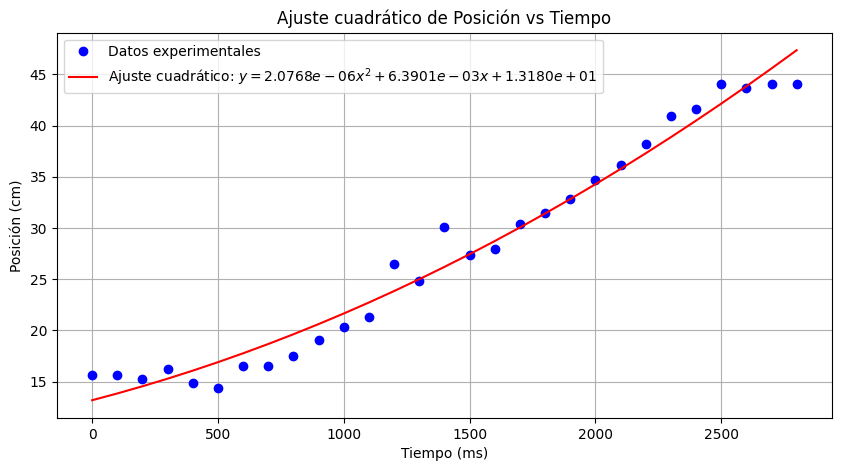

(4.153609936934552e-06,
 1.054208158038686e-06,
 array([2.07680497e-06, 6.39006926e-03, 1.31799467e+01]),
 array([5.27104079e-07, 1.52751087e-03, 9.23843683e-01]))

In [ ]:

import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

# Datos proporcionados en formato de diccionario para crear el DataFrame
data = {
    "Tiempo": [
        0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 
        1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800
    ],
    "Posición": [
        15.61, 15.61, 15.27, 16.23, 14.91, 14.33, 16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 
        26.52, 24.8, 30.14, 27.4, 27.97, 30.4, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 
        41.57, 44.03, 43.62, 44.03, 44.03
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Definir la función cuadrática
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Realizar el ajuste cuadrático
x_data = df["Tiempo"]
y_data = df["Posición"]

# Ajustar los datos a un polinomio de segundo grado
params, covariance = curve_fit(quadratic, x_data, y_data)

# Coeficientes del polinomio
a, b, c = params

# Incertezas de los coeficientes (diagonales de la matriz de covarianza)
incertezas = np.sqrt(np.diag(covariance))

# Calcular la aceleración promedio (2 veces el coeficiente a)
aceleracion = 2 * a
incerteza_aceleracion = 2 * incertezas[0]

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, 'bo', label='Datos experimentales')
plt.plot(x_data, quadratic(x_data, *params), 'r-', label=f'Ajuste cuadrático: $y = {a:.4e}x^2 + {b:.4e}x + {c:.4e}$')
plt.xlabel("Tiempo (ms)")
plt.ylabel("Posición (cm)")
plt.title("Ajuste cuadrático de Posición vs Tiempo")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los resultados
(aceleracion, incerteza_aceleracion, params, incertezas)


# 5 - 

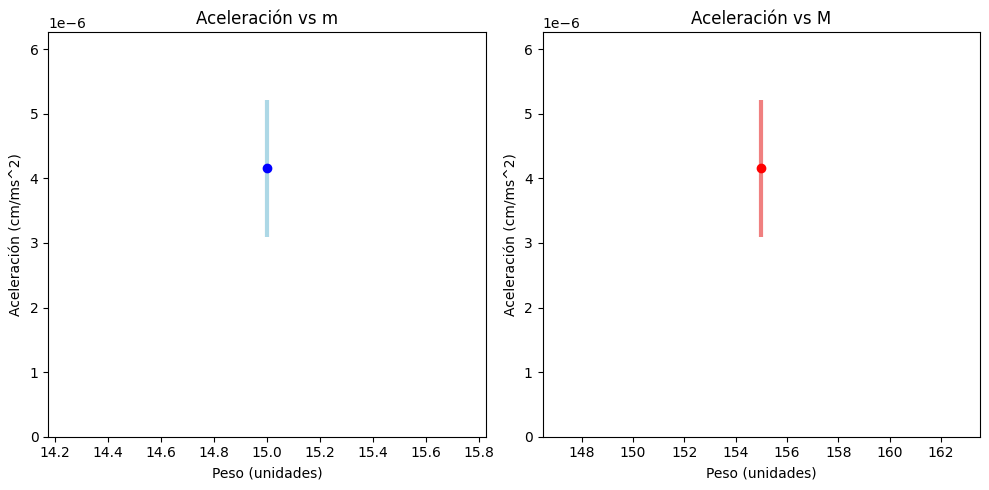

In [ ]:
import matplotlib.pyplot as plt

# Pesos de los objetos
m = 15  # pelotita plateada
M = 155  # trineo

# Aceleración calculada y su incerteza
aceleracion = 4.153609936934552e-06
incerteza_aceleracion = 1.0542081580386782e-06

# Crear gráficos
plt.figure(figsize=(10, 5))

# Gráfico de Aceleración vs m
plt.subplot(1, 2, 1)
plt.errorbar(m, aceleracion, yerr=incerteza_aceleracion, fmt='o', color='blue', ecolor='lightblue', elinewidth=3, capsize=0)
plt.title("Aceleración vs m")
plt.xlabel("Peso (unidades)")
plt.ylabel("Aceleración (cm/ms^2)")
plt.ylim(0, aceleracion + incerteza_aceleracion*2)

# Gráfico de Aceleración vs M
plt.subplot(1, 2, 2)
plt.errorbar(M, aceleracion, yerr=incerteza_aceleracion, fmt='o', color='red', ecolor='lightcoral', elinewidth=3, capsize=0)
plt.title("Aceleración vs M")
plt.xlabel("Peso (unidades)")
plt.ylabel("Aceleración (cm/ms^2)")
plt.ylim(0, aceleracion + incerteza_aceleracion*2)

plt.tight_layout()
plt.show()

# 6 - 

0.009440962947296504
0.05201843297185899
0.02861348824503519
0.009506852767300036
0.017651657640642325
0.004345268173006369
[0.009440962947296504, 0.05201843297185899, 0.02861348824503519, 0.009506852767300036, 0.017651657640642325, 0.004345268173006369]


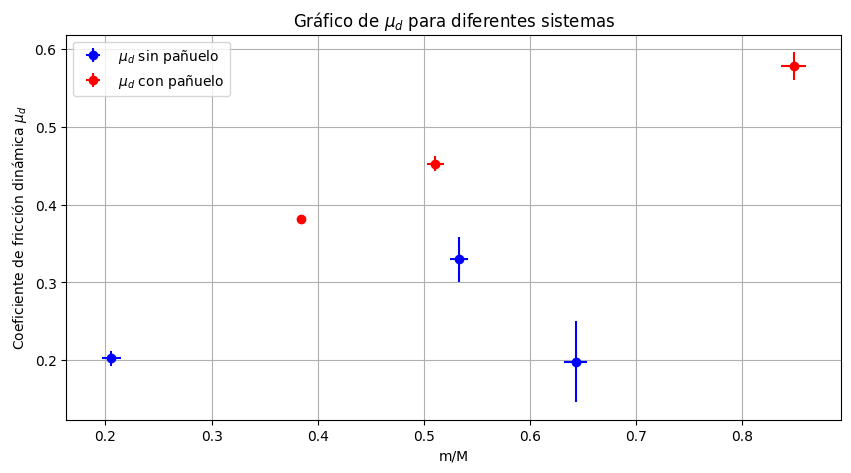

Prueba 1: Coeficiente de fricción dinámico μ_d = 0.2023 con aceleracion 2.43153474912205
Prueba 2: Coeficiente de fricción dinámico μ_d = 0.1979 con aceleracion 262.6904706989333
Prueba 3: Coeficiente de fricción dinámico μ_d = 0.3297 con aceleracion 128.80952912483082
Prueba 4: Coeficiente de fricción dinámico μ_d = 0.4526 con aceleracion 37.244505338271196
Prueba 5: Coeficiente de fricción dinámico μ_d = 0.5784 con aceleracion 141.5952374657563
Prueba 6: Coeficiente de fricción dinámico μ_d = 0.3818 con aceleracion 1.9760210334316801
promedio sin rozaminento 0.2433331484164637 con error 0.030024294721396894
promedio con rozaminento 0.47095071587976517 con error 0.01050125952698291


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def propagacion_error(f, derivadas, errores):
    """
    f: Función objetivo, no se utiliza directamente en esta implementación
    derivadas: Lista de derivadas parciales [df/dx1, df/dx2, df/dx3]
    errores: Lista de errores [σ_x1, σ_x2, σ_x3]
    
    Retorna: Propagación del error
    """
    # Inicializamos la propagación del error en 0
    sigma_f_squared = 0

    # Calculamos el cuadrado de la propagación del error
    for derivada, error in zip(derivadas, errores):
        sigma_f_squared += (derivada**2) * (error**2)
    
    # Retornamos la raíz cuadrada para obtener el error final
    return np.sqrt(sigma_f_squared)

# Definir los valores de las constantes y las variables específicas
g = 9.7  # m/s² (gravedad proporcionada en tu fórmula)

# Datos para cada prueba
datos = [
    {"m": 112, "M": 23, "a": a_1, "incer":sigma_a_1},  # Prueba 1: Plateada 23g, Trineo 112g
    {"m": 112, "M": 72, "a": a_2, "incer":sigma_a_2},  # Prueba 2: Dorada 72g, Trineo 112g
    {"m": 135, "M": 72, "a": a_3, "incer":sigma_a_3},  # Prueba 3: Dorada 73g, Trineo 113g + Plateada 23g adentro
    {"m": 141, "M": 72, "a": a_4, "incer":sigma_a_4},  # Prueba 4 (dorada 72g vs plata 23g y madera 6g y trineo 112g, con rozamiento)
    {"m": 112, "M": 95, "a": a_5, "incer":sigma_a_5},  # Prueba 5 (plata 23g y dorada 72g vs trineo 112g, con rozamiento)
    {"m": 247, "M": 95, "a": a_6, "incer":sigma_a_6},  # Prueba 6 (plata 23g y dorada 72g vs trineo 112g y cacluladora 135g, con rozamiento)               
]
# para calcular el erroe hacer propagacion del error de 3 variables (m,M,a). Buscar una libreria para no comerme toda la formula
# Convertir aceleraciones de cm/s² a m/s²
for dato in datos:
    dato["a"] = dato["a"] / 100  # convertir de cm/s² a m/s²

# Calcular el coeficiente de fricción dinámica μ_d para cada prueba
mu_d_values = []
incertezas_mu = []
incertezas_ratio = []
ratios = []
for dato in datos:
    M = dato["M"]
    m = dato["m"]
    a = dato["a"]
    incer = dato["incer"] /100

    # mu_deriv_M = (97 - 10*a) / (97 * m)
    mu_deriv_M = 1/m - a/(m*g)
    mu_deriv_m = -M/m**2 + a*M / (g*m**2)
    # mu_deriv_a = -10*(m+M) / (97*m)
    mu_deriv_a = (m+M)/(m*g)
    ratio_deriv_m = -M/(m**2)
    ratio_deriv_M = 1/m                   
    errorRatio = propagacion_error(1,[ratio_deriv_m,ratio_deriv_M],[1,1])      
    incertezas_ratio.append(errorRatio)
    ratios.append(M/m)
    # Aplicar la fórmula
    mu_d = (M * g - a * (M + m)) / (m * g)
    error = propagacion_error(1,[mu_deriv_M,mu_deriv_a,mu_deriv_m],[1,incer,1])
    print(error)
    # print(error)
    incertezas_mu.append(error)
    mu_d_values.append(mu_d)

print(incertezas_mu)
# Crear gráfico de μ_d
plt.figure(figsize=(10, 5))
# plt.scatter(ratios[:3], mu_d_values[:3], color='blue', label='$\\mu_d$')
# plt.scatter(ratios[-3:], mu_d_values[-3:], color='red', label='$\\mu_d$')
plt.xlabel('m/M')
plt.ylabel('Coeficiente de fricción dinámica $\\mu_d$')
plt.title('Gráfico de $\\mu_d$ para diferentes sistemas')
plt.grid(True)
plt.errorbar(ratios[:3], mu_d_values[:3],xerr=incertezas_ratio[:3] ,yerr=incertezas_mu[:3],fmt='o', color='blue', label='$\\mu_d$ sin pañuelo')
plt.errorbar(ratios[-3:], mu_d_values[-3:],xerr=incertezas_ratio[-3:],yerr=incertezas_mu[-3:],fmt='o', color='red', label='$\\mu_d$ con pañuelo')
plt.legend()
plt.show()

# Imprimir los resultados numéricos
for i in range(len(mu_d_values)):
    print(f"Prueba {i+1}: Coeficiente de fricción dinámico μ_d = {mu_d_values[i]:.4f} con aceleracion {aceleraciones[i]}")
promedioSinRoza = sum(mu_d_values[:3]) / 3 
promedioConRoza = sum(mu_d_values[-3:]) / 3
promedioSinRozaError = sum(incertezas_mu[:3]) / 3
promedioConRozaError = sum(incertezas_mu[-3:]) / 3
print(f"promedio sin rozaminento {promedioSinRoza} con error {promedioSinRozaError}")
print(f"promedio con rozaminento {promedioConRoza} con error {promedioConRozaError}")

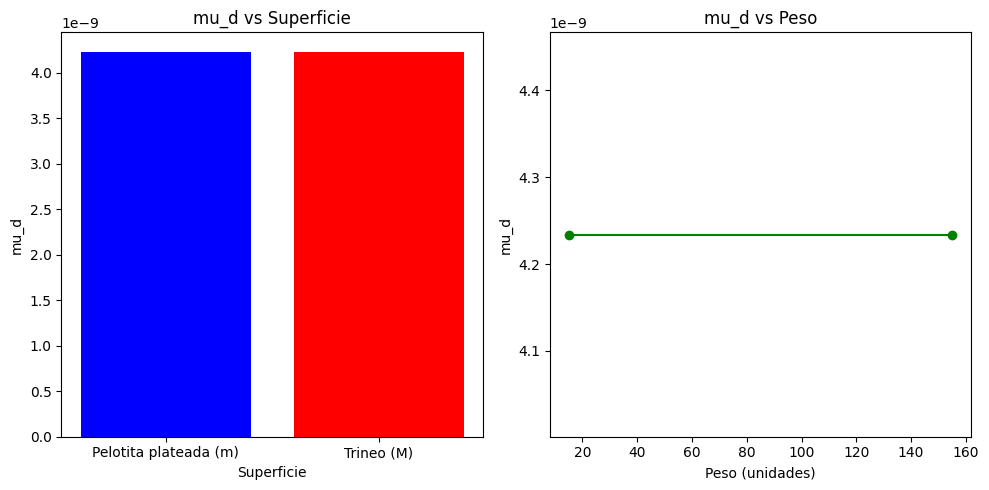

In [ ]:

import matplotlib.pyplot as plt

# Coeficientes de rozamiento calculados
mu_d_m = 4.234057020320644e-09
mu_d_M = 4.234057020320644e-09

# Pesos y superficies
pesos = [m, M]
mu_d_values = [mu_d_m, mu_d_M]
superficies = ["Pelotita plateada (m)", "Trineo (M)"]

# Crear gráfico de mu_d vs superficie
plt.figure(figsize=(10, 5))

# Gráfico de mu_d vs superficie
plt.subplot(1, 2, 1)
plt.bar(superficies, mu_d_values, color=['blue', 'red'])
plt.title("mu_d vs Superficie")
plt.xlabel("Superficie")
plt.ylabel("mu_d")

# Gráfico de mu_d vs peso
plt.subplot(1, 2, 2)
plt.plot(pesos, mu_d_values, 'o-', color='green')
plt.title("mu_d vs Peso")
plt.xlabel("Peso (unidades)")
plt.ylabel("mu_d")

plt.tight_layout()
plt.show()
